In [2]:
import numpy as np
import matplotlib.pyplot as plt
from myio import *
from simulation import *

In [3]:
spec_names=('gap', 'shifted_gap','shifted_gap_2', 'log10_gap', 'log10_shifted_gap', 'log10_shifted_gap_2', 'ratio')
time_set= np.power(2, np.arange(40))
lenarr=len(time_set)

In [3]:
# for L in [5]:
#     for lambd in np.linspace(0,1,11):
#         dim_loc=4
#         n_dis=100
#         simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
#         phi=np.pi/3
#         eps=0.1
#         time_set= np.power(2, np.arange(40))
#         idata={'JZZ': 1.0, 'hZ': 1.0, 'hX': 1.0, 'alphas': np.array([(1-lambd)*np.exp(1j*phi)/2, 1, (1-lambd)*np.exp(-1j*phi)/2]),\
#                'betas': np.array([eps,lambd, eps]), 'lambdas': np.array([eps,1,eps]),\
#                'phi': phi, 'lambd': lambd}
#         filename='clock4/clock4_%d_%.2f.txt' %(L,lambd)

#         clockH, clockK, clockZ = clock(dim_loc, L)
#         Z_mean, Z_var, Y_mean, Y_var, spectral_data, spectral_data_var = simulation(dim_loc, L, n_dis, idata, clockH, clockK, clockZ, time_set)

#         with open(filename, 'wb') as f:
#                 for key, value in simdict.items():
#                     f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
#                 for key, value in idata.items():
#                     f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
#                 for i in range(7):
#                     f.write(('\n# '+spec_names[i]+' '+str(spectral_data[i])+' '+str(spectral_data_var[i])).encode('utf-8'))
#                 f.write('\n# time\tRe(Z)\Im(Z)\tVar(Re(Z))\tVar(Im(Z))\n'.encode('utf-8'))
#                 np.savetxt(f, np.stack((time_set, np.real(Z_mean), np.imag(Z_mean),\
#                             np.real(Z_var), np.imag(Z_var), np.real(Y_mean), np.imag(Y_mean),\
#                                         np.real(Y_var), np.imag(Y_var)), axis=-1))

In [4]:
mydt=dt(lenarr)
dataset=np.empty((5,11), dtype=mydt)
for L in range(2,7):
    for i, x in enumerate(np.linspace(0,1,11)):
        d=get_data('clock4/clock4_%d_%.2f.txt' %(L, x), mydt)
        dataset[L-2][i]=d

/home/federica/Documenti/gitrep/exactdiag/2018/myio.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  d['ReY'], d['ImY'], d['ReVarY'], d['ImVarY']=np.genfromtxt(file, unpack=True, dtype=np.complex128)


In [5]:
def tdecay(sigma):
    return np.argmax(sigma<0.5)
    
# def tdecay(vec):
#     return np.argmax(-np.gradient(vec))

<IPython.core.display.Javascript object>


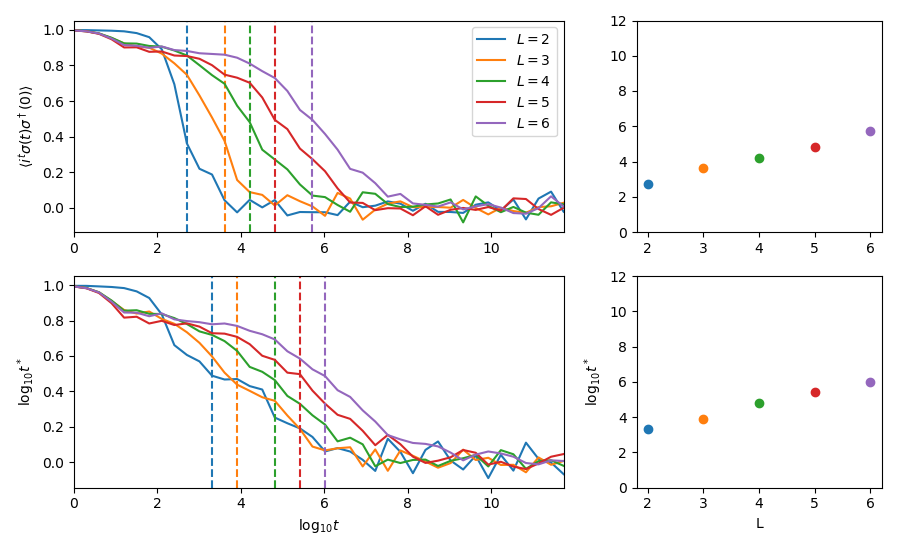

In [6]:
%matplotlib notebook
from ipywidgets import *
x=0.0
i=int(x*10)

f, ax = plt.subplots(2,2,figsize=(9,5.5), gridspec_kw = {'width_ratios':[2, 1]}, sharex=False, sharey=False)
for j, sim in enumerate(dataset[:,i]):
    ax[0][0].plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % sim['L'])
    t0d=tdecay(sim['ReZ'])
    ax[0][0].axvline(x=np.log10(sim['time_set'][t0d]), color='C%d' %(sim['L']-2), linestyle='dashed')
    ax[0][1].plot(sim['L'], np.log10(sim['time_set'][t0d]), marker='o')
    ax[1][0].plot(np.log10(sim['time_set']), sim['ReY'],label= r'$L=$%d' % sim['L'])
    t1d=tdecay(sim['ReY'])
    ax[1][0].axvline(x=np.log10(sim['time_set'][t1d]), color='C%d' %(sim['L']-2), linestyle='dashed')
    ax[1][1].plot(sim['L'], np.log10(sim['time_set'][t1d]), marker='o')
ax[1][0].set_xlabel(r'$\log_{10} t$')
ax[0][0].set_ylabel(r'$\langle i^t\sigma (t)\sigma^\dagger(0)\rangle$')
ax[1][0].set_ylabel(r'$\langle (-1)^t\sigma^2 (t)\sigma^2(0)\rangle$')
xlim=np.log10(dataset[0,0]['time_set'][[0,-1]])
ax[0][0].set_xlim(xlim)
ax[1][0].set_xlim(xlim)
ax[0][1].set_ylim((0,12))
ax[1][1].set_ylim((0,12))
ax[1][1].set_xlabel('L')
ax[1][1].set_ylabel(r'$\log_{10} t^*$')
ax[1][0].set_ylabel(r'$\log_{10} t^*$')
ax[0][0].legend()
plt.tight_layout()
plt.show()
#def update(x = (0,1,0.1)):
def update(x=widgets.FloatSlider(min=0,max=1,step=0.1,description=r'$\lambda$')):
    i=int(x*10)
    
    for j, line in enumerate(ax[0][0].lines[::2]):
            line.set_ydata(dataset[j,i]['ReZ'])
    for j, line in enumerate(ax[1][0].lines[::2]):
            line.set_ydata(dataset[j,i]['ReY'])
    for j, line in enumerate(ax[0][0].lines[1::2]):
            t0d=tdecay(dataset[j,i]['ReZ'])
            line.set_xdata(2*[np.log10(dataset[j,i]['time_set'][t0d])])
            ax[0][1].lines[j].set_ydata(np.log10(sim['time_set'][t0d]))
    for j, line in enumerate(ax[1][0].lines[1::2]):
            t1d=tdecay(dataset[j,i]['ReY'])
            line.set_xdata(2*[np.log10(dataset[j,i]['time_set'][t1d])])
            ax[1][1].lines[j].set_ydata(np.log10(sim['time_set'][t1d]))
    f.canvas.draw()
    #f.savefig('Z%d.pdf' % i)

In [7]:
interact(update);

interactive(children=(FloatSlider(value=0.0, description='$\\lambda$', max=1.0), Output()), _dom_classes=('wid…

<IPython.core.display.Javascript object>


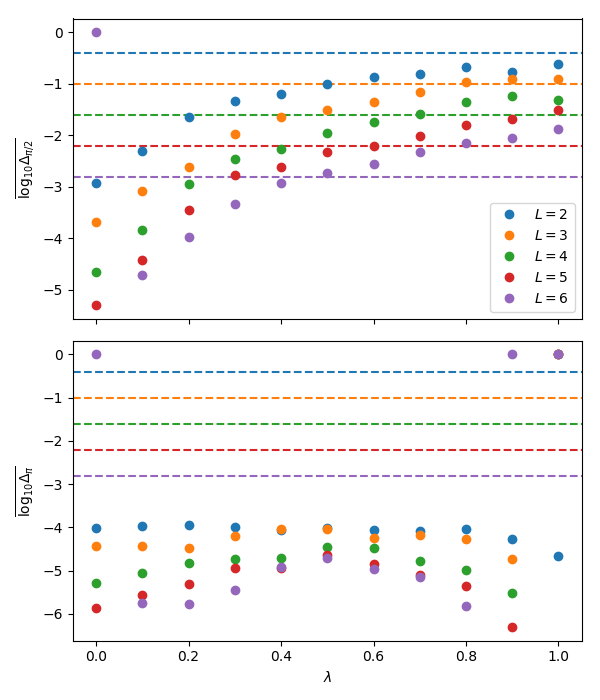

In [8]:
%matplotlib notebook
import matplotlib.lines as mlines
f2, ax2 = plt.subplots(2,1,figsize=(6,7), sharex=True)


handles=[]

for L in range(2,7):
    ax2[0].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
    ax2[1].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
    handles.append(mlines.Line2D([], [], color='C%d' %(L-2), linestyle='', marker='o', label=r'$L=$%d' % L))
for sim in np.nditer(dataset):
    ax2[0].plot(sim['lambd'], sim['log10_shifted_gap'][0],marker='o',label= r'$L=$%d' % sim['L'], color='C%d' %(sim['L']-2))
    ax2[1].plot(sim['lambd'], sim['log10_shifted_gap_2'][0], marker='o',label= r'$L=$%d' % sim['L'], color='C%d' %(sim['L']-2))
ax2[0].legend(handles=handles)

ax2[1].set_xlabel(r'$\lambda$')
ax2[0].set_ylabel(r'$\overline{\log_{10} \Delta_{\pi/2}}$')
ax2[1].set_ylabel(r'$\overline{\log_{10} \Delta_{\pi}}$')
plt.tight_layout()

plt.show()

In [3]:
for L in [2,3,4]:
    dim_loc=4
    n_dis=100
    simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
    phi=np.pi/3
    eps=0.1
    idata=[]
    filename='clock4IPR/clock4_%d.txt' %L
    lvec=np.linspace(0,1,11)
    for i,lambd in enumerate(lvec):
        idata.append({'JZZ': 1.0, 'hZ': 1.0, 'hX': 1.0,\
                      'alphas': np.array([(1-lambd)*np.exp(1j*phi)/2, 1, (1-lambd)*np.exp(-1j*phi)/2]),\
               'betas': np.array([eps,lambd, eps]), 'lambdas': np.array([eps,1,eps]),\
               'phi': phi, 'lambd': lambd})
        

    clockH, clockK, clockZ = clock(dim_loc, L)
    overlap_step, overlap_tot, IPR_step, IPR_tot = IPR(dim_loc, L, n_dis, idata, clockH, clockK)

    with open(filename, 'wb') as f:
            for key, value in simdict.items():
                f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
            for key, value in idata[0].items():
                f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
            f.write('\n# lambda\toverlap step\toverlap tot\tIPR step\tIPR tot\n'.encode('utf-8'))
            np.savetxt(f, np.stack((lvec, np.array(overlap_step), np.array(overlap_tot),
                                    np.array(IPR_step), np.array(IPR_tot)), axis=-1))

size 2 	disorder realization 0 	time elapsed 1.338730812072754
size 2 	disorder realization 1 	time elapsed 0.6102712154388428
size 2 	disorder realization 2 	time elapsed 0.5929076671600342
size 2 	disorder realization 3 	time elapsed 0.459200382232666
size 2 	disorder realization 4 	time elapsed 0.4415874481201172
size 2 	disorder realization 5 	time elapsed 0.44556713104248047
size 2 	disorder realization 6 	time elapsed 0.44570255279541016
size 2 	disorder realization 7 	time elapsed 0.4458479881286621
size 2 	disorder realization 8 	time elapsed 0.45080018043518066
size 2 	disorder realization 9 	time elapsed 0.4441235065460205
size 2 	disorder realization 10 	time elapsed 0.4462287425994873
size 2 	disorder realization 11 	time elapsed 0.45108771324157715
size 2 	disorder realization 12 	time elapsed 0.4412565231323242
size 2 	disorder realization 13 	time elapsed 0.44669127464294434
size 2 	disorder realization 14 	time elapsed 0.4401528835296631
size 2 	disorder realization 15 

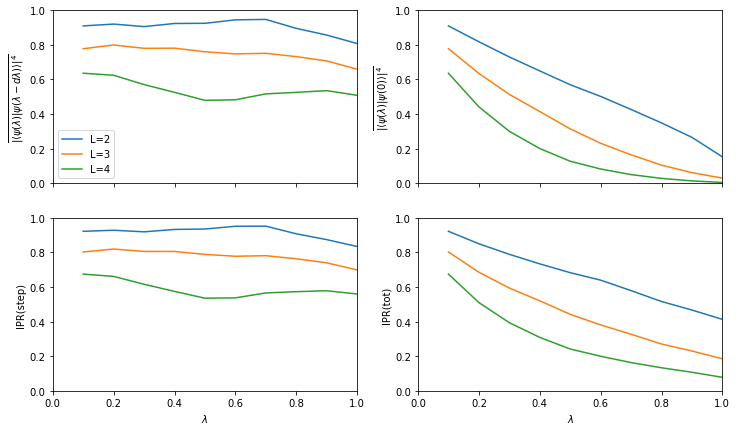

In [18]:
%matplotlib inline

fig, axes = plt.subplots(2,2,figsize=(12,7), sharex=True)
for L in [2,3,4]:
    l, overlapstep, overlaptot, IPRstep, IPRtot =np.loadtxt('clock4IPR/clock4_%d.txt' %L, unpack=True)
    axes[0,0].plot(l[1:],overlapstep[1:], label='L=%d' %L)
    axes[0,1].plot(l[1:],overlaptot[1:])
    axes[1,0].plot(l[1:],IPRstep[1:], label='L=%d' %L)
    axes[1,1].plot(l[1:],IPRtot[1:])
axes[0,0].legend()
axes[1,0].set_xlabel(r'$\lambda$')
axes[1,1].set_xlabel(r'$\lambda$')
axes[0,0].set_ylabel(r'$\overline{|\langle \psi(\lambda)|\psi(\lambda-d\lambda)\rangle|^4}$')
axes[0,1].set_ylabel(r'$\overline{|\langle \psi(\lambda)|\psi(0)\rangle|^4}$')
axes[1,0].set_ylabel('IPR(step)')
axes[1,1].set_ylabel('IPR(tot)')
for ax in axes.flatten():
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
plt.show()
plt.savefig('IPR.eps')

In [9]:
import glob
import re
len1 = 15
len2 = 12 #length of epsilons
dt = np.dtype([('size', np.int32), ('lambd', np.float64), ('spec', np.float64, (len1, len2))])
specdata = np.empty(0,dtype=dt)
for name in glob.glob('./clock4spec/*.txt'):
    spec = np.loadtxt(name, unpack = True)
    m = re.match('^\./clock4spec/spec_(\d)_(\d\.\d+).txt$', name)
    size = int(m.group(1))
    lambd = float(m.group(2))
    
    specdata = np.append(specdata, np.array([(size, lambd, spec)], dtype=dt))

In [12]:
from scipy.optimize import curve_fit

def line(x, a, b):
    return a * x + b

<IPython.core.display.Javascript object>


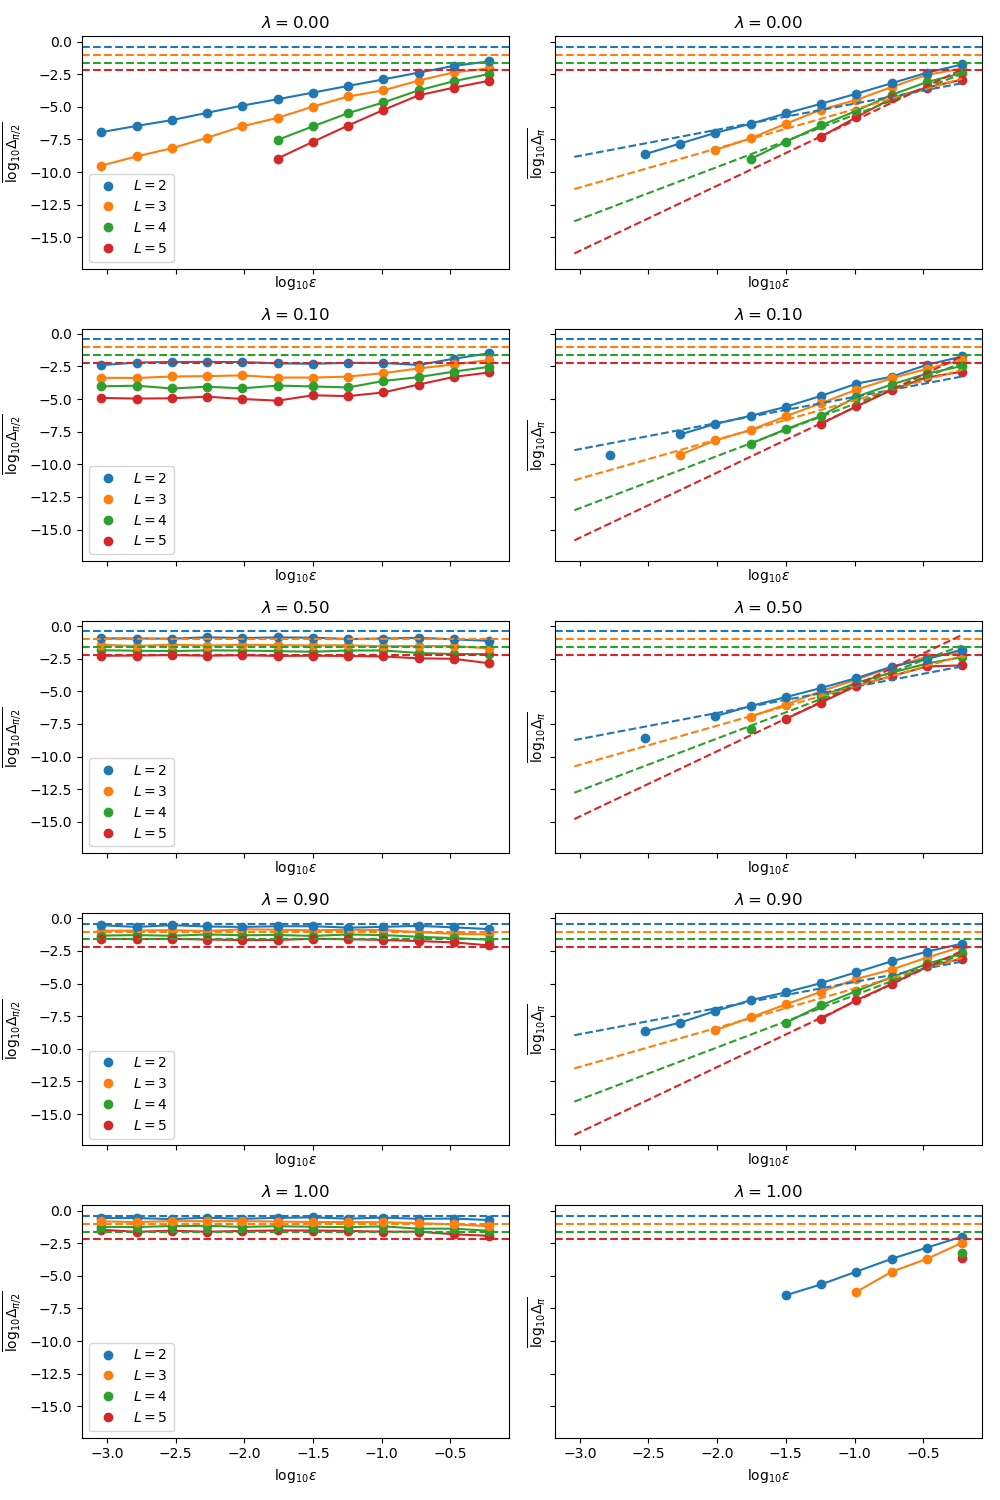

[3. 2. 4. 5.] [-1.92252873 -2.89894046 -1.70200776 -1.06837966]
[2. 5. 3. 4.] [-2.8939867  -0.67434144 -2.01835178 -1.33652832]
[4. 3. 5. 2.] [-0.63473308 -1.48053565  0.37557465 -2.74590056]
[3. 4. 5. 2.] [-2.2098897  -1.84855851 -1.48149802 -3.00518836]
[5. 4. 2. 3.] [        nan         nan -3.32471997         nan]


/home/federica/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/federica/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
%matplotlib notebook
import matplotlib.lines as mlines

cutoff=0.06
lambdalist = [0.,0.1,0.5, 0.9,1.0]

figspec, axspec = plt.subplots(len(lambdalist),2,figsize=(10,3*len(lambdalist)), sharex=True, sharey=True)

popt = []
pcov = []

handles=[]
for L in range(2,6):
    handles.append(mlines.Line2D([], [], color='C%d' %(L-2), linestyle='', marker='o', label=r'$L=$%d' % L))

for i, lamb in enumerate(lambdalist):
    c_arr=np.array([])
    L_arr=np.array([])

        
    for vec in specdata[np.where(specdata['lambd']==lamb)]:
        
        axspec[i][0].plot(np.log10(vec['spec'][0]), vec['spec'][5],\
                          marker='o',label= r'$L=$%d' % vec['size'], color='C%d' %(vec['size']-2))
        axspec[i][1].plot(np.log10(vec['spec'][0]), vec['spec'][6],\
                          marker='o',label= r'$L=$%d' % vec['size'], color='C%d' %(vec['size']-2))
        #axspec[i][1].plot(np.log10(vec['spec'][0]), vec['spec'][6]-vec['size']*np.log10(vec['spec'][0]),\
        #                  marker='o',label= r'$L=$%d' % vec['size'], color='C%d' %(vec['size']-2))
        #axspec[i][1].plot(vec['size']*np.log10(vec['spec'][0]/0.29),\
        #vec['spec'][6], marker='o',label= r'$L=$%d' % vec['size'], color='C%d' %(vec['size']-2))
        c=vec['spec'][6]-vec['size']*np.log10(vec['spec'][0])
        cond=np.where(np.all([vec['spec'][0]<cutoff, vec['spec'][6] != -np.inf], axis=0))
        #print(cond)
        if len(cond)>0:
            c_arr =np.append(c_arr,np.mean(c[cond]))
            L_arr = np.append(L_arr, vec['size'])#np.concatenate((L_arr,vec['size']*np.ones(len(cond[0]))))
    print(L_arr, c_arr)
    try:
        popt1, pcov1 = curve_fit(line, L_arr, c_arr)
        popt.append(popt1)
        pcov.append(pcov1)
    except: popt1=[np.nan,np.nan]
    for L in range(2,6):
        axspec[i][0].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
        axspec[i][1].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
        axspec[i][1].plot(np.log10(vec['spec'][0]), line(L, popt1[0], popt1[1])+ L*np.log10(vec['spec'][0]),\
         c='C%d' %(L-2), linestyle='dashed')
    axspec[i][0].legend(handles=handles)
    axspec[i][0].set_title(r'$\lambda=$%.2f' %lamb)
    axspec[i][1].set_title(r'$\lambda=$%.2f' %lamb)
    axspec[i][0].set_xlabel(r'$\log_{10} \epsilon$')
    axspec[i][1].set_xlabel(r'$\log_{10} \epsilon$')
    axspec[i][0].set_ylabel(r'$\overline{\log_{10} \Delta_{\pi/2}}$')
    axspec[i][1].set_ylabel(r'$\overline{\log_{10} \Delta_{\pi}}$')

plt.tight_layout()

plt.show()

In [39]:
from scipy.optimize import curve_fit

def line(x, a, b):
    return a * x + b



In [40]:
hc=10**(-popt[0])
dhc=np.sqrt(pcov[0][0])
print(hc, dhc)

0.33699299878102157 0.05130934939383115
